In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [6]:
curve_u = np.genfromtxt('curve_u.txt', delimiter=';', dtype=float)
curve_u = curve_u[curve_u[:, 0].argsort()]
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.txt', delimiter=';', dtype=float)
curve_l = curve_l[curve_l[:, 0].argsort()]
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([ 1.37,  1.42,  1.47,  1.51,  1.63,  1.91,  2.12,  2.53,  3.14,
        4.09,  5.65,  8.64, 15.87, 24.86])

array([9.02149e+03, 4.11804e+03, 1.61166e+03, 1.00227e+03, 3.10740e+02,
       7.66700e+01, 4.16100e+01, 2.08200e+01, 1.25500e+01, 8.92000e+00,
       7.46000e+00, 6.83000e+00, 6.81000e+00, 6.83000e+00])

array([ 1.16,  1.19,  1.23,  1.3 ,  1.37,  1.54,  1.68,  1.97,  2.48,
        3.11,  4.24,  5.98,  8.22, 10.83, 16.11, 25.23])

array([8.46816e+03, 3.67365e+03, 1.50162e+03, 5.17450e+02, 2.12250e+02,
       5.39400e+01, 2.47800e+01, 1.08100e+01, 5.22000e+00, 3.45000e+00,
       2.53000e+00, 2.15000e+00, 2.04000e+00, 2.04000e+00, 2.03000e+00,
       2.05000e+00])

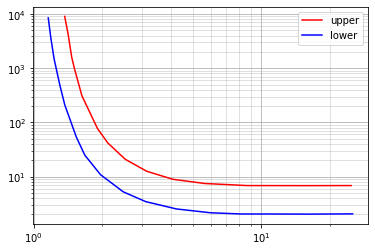

In [7]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[1.28783, -1.3829, 1.20245, -0.03303, -0.31883, 0.07841]

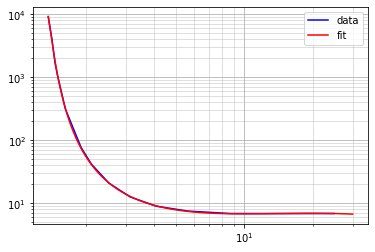

In [23]:
# Curve fitting upper

In = 1.3
order=5
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 30, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[1.00878, -2.08708, 2.09871, -0.48951, -0.5111, 0.34351, -0.05678]

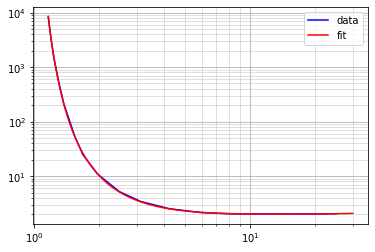

In [24]:
# Curve fitting lower

In=1
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 30, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))